In [2]:
from sklearn.preprocessing import RobustScaler, StandardScaler
import pandas_profiling
from statsmodels.robust.scale import huber
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import re
import locale
import geopandas
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns
sns.set_style('dark')  

pd.set_option('display.max_rows', 0)
pd.set_option('display.max_columns', 0)


df_final_pob=pd.read_parquet('../data/main_processed/df_final_pob.parquet')

df_indicadores_pob=pd.read_parquet('../data/main_processed/df_indicadores_pob.parquet')

df_indicadores_pob_pivot=pd.read_parquet('../data/main_processed/df_indicadores_pob_pivot.parquet')

df_final_pob_melt=pd.read_parquet('../data/main_processed/df_final_pob_melt.parquet')

df_final_pob_melt_PC=pd.read_parquet('../data/main_processed/df_final_pob_melt_PC.parquet')

CCAA_CO = pd.read_parquet('../data/main_processed/CCAA_CO.parquet')
MUNI_CO = pd.read_parquet('../data/main_processed/MUNI_CO.parquet')
PROV_CO = pd.read_parquet('../data/main_processed/PROV_CO.parquet')

df_final_pob_dropdown=pd.read_parquet('../data/main_processed/df_final_pob_dropdown.parquet')

df_final_pob_dropdown_c=pd.read_parquet('../data/main_processed/df_final_pob_dropdown_c.parquet')

df_final_pob_poblaciontext=pd.read_parquet('../data/main_processed/df_final_pob_poblaciontext.parquet')

In [3]:
CCAA_types='Andalucía'
municipio_types= 'Sevilla'
cohorte='1.000-2.000'
partida_de_coste_types='Abastecimiento de agua potable'

In [5]:
df_final_pob_round = df_final_pob[['PC_TOTAL','codigo_geo','CCAA', 'Provincia', 'Nombre Ente Principal','Población 2018']]
df_final_pob_round['Población'] = df_final_pob_round['Población 2018']
df_final_pob_round['PC_TOTAL'] = round(df_final_pob_round['PC_TOTAL'],)

df_final_pob_round

/home/carpiero/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/carpiero/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PC_TOTAL,codigo_geo,CCAA,Provincia,Nombre Ente Principal,Población 2018,Población
0,1021.0,4001,Andalucía,Almería,Abla,1235.0,1235.0
1,415.0,4002,Andalucía,Almería,Abrucena,1150.0,1150.0
2,722.0,4003,Andalucía,Almería,Adra,24859.0,24859.0
3,564.0,4004,Andalucía,Almería,Albánchez,753.0,753.0
4,1139.0,4005,Andalucía,Almería,Alboloduy,621.0,621.0
5,446.0,4006,Andalucía,Almería,Albox,11696.0,11696.0
6,913.0,4007,Andalucía,Almería,Alcolea,814.0,814.0
7,817.0,4008,Andalucía,Almería,Alcóntar,528.0,528.0
8,1372.0,4009,Andalucía,Almería,Alcudia de Monteagud,135.0,135.0
...,...,...,...,...,...,...,...


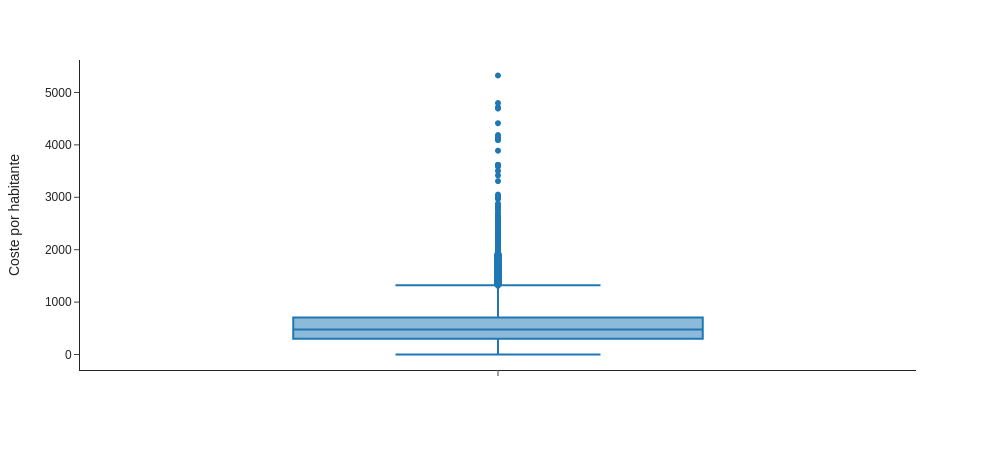

In [22]:
df = df_final_pob_round
listi=['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']
fig = px.box(df , y='PC_TOTAL',points='suspectedoutliers',labels={'PC_TOTAL': 'Coste por habitante'} ,
                                       hover_name='Nombre Ente Principal' , hover_data={'Población': ':,' ,
                                                                                        'PC_TOTAL': ":,€"},template=listi[2])
fig

In [46]:
top=df_final_pob[['CCAA', 'Provincia', 'Tipo Ente Principal', 'Nombre Ente Principal',
       'Código Ente Principal', 'Población 2018', 'TOTAL',
       'PC_TOTAL', 'cohorte_pob', 'codigo_geo','PC_Transporte colectivo urbano de viajeros']].sort_values(by='PC_Transporte colectivo urbano de viajeros',ascending=False)

top.loc[top['Población 2018']<50000].head(10)

,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,Población 2018,TOTAL,PC_TOTAL,cohorte_pob,codigo_geo,PC_Transporte colectivo urbano de viajeros
4713,Comunitat Valenciana,Valencia / València,Ayuntamiento,Cortes de Pallás,17-46-099-AA-000,818.0,2298901.04,2810.392469,0-1.000,46099,182.532066
1080,Aragón,Zaragoza,Ayuntamiento,Terrer,02-50-253-AA-000,485.0,151877.37,313.149216,0-1.000,50253,148.143505
739,Aragón,Huesca,Ayuntamiento,Montanuy,02-22-157-AA-000,215.0,948738.30,4412.736279,0-1.000,22157,84.242372
4047,Galicia,Ourense,Ayuntamiento,Chandrexa de Queixa,11-32-029-AA-000,466.0,410719.13,881.371524,0-1.000,32029,69.012876
4373,La Rioja,"Rioja, La",Ayuntamiento,Villamediana de Iregua,16-26-168-AA-000,7973.0,2807779.30,352.160956,5.000-10.000,26168,58.369590
3487,Cataluña,Tarragona,Ayuntamiento,Mont-roig del Camp,09-43-092-AA-000,11809.0,17218001.91,1458.040639,10.000-20.000,43092,51.692594
744,Aragón,Huesca,Ayuntamiento,Panticosa,02-22-170-AA-000,786.0,1325951.00,1686.960560,0-1.000,22170,49.239186
2071,Castilla y León,Salamanca,Ayuntamiento,Carrascal de Barregas,07-37-087-AA-000,1188.0,539318.04,453.971414,1.000-2.000,37087,48.031077
2884,Cataluña,Barcelona,Ayuntamiento,Lliçà d'Amunt,09-08-107-AA-000,15111.0,14262110.35,943.823066,10.000-20.000,8107,44.032108
1149,Principado de Asturias,Asturias,Ayuntamiento,Mieres (Asturias),03-33-037-AA-000,38428.0,21444849.51,558.052709,20.000-50.000,33037,39.976665
